In [1]:
!pip install qiskit

     |████████████████████████████████| 2.7MB 2.8MB/s 
     |████████████████████████████████| 18.2MB 132kB/s 
     |████████████████████████████████| 92kB 10.8MB/s 
     |████████████████████████████████| 102kB 11.2MB/s 
     |████████████████████████████████| 983kB 25.8MB/s 
     |████████████████████████████████| 5.6MB 48.3MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 573kB 55.0MB/s 
     |████████████████████████████████| 21.7MB 107kB/s 
     |████████████████████████████████| 2.3MB 44.8MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
  Created wheel for qiskit: filename=qiskit-0.14.0-cp36-none-any.whl size=1400 sha256=c5058537fa7f4bbaa06832d3cc1d24e8546cf0ea8b21c9484d546c30fd0f6c37
  Stored in directory: /root/.cache/pip/wheels/78/56/d2/194c8ea4c20e67c47402

# Quantum Error Correction

Quantum Error Correction is used to protect quantum information from errors due to decoherence and quantum noises. <br>

For classical error correction, we can simply make multiple copies of the information. But in quantum world, we can not make copies of quantum states due to Quantum No Cloning Theorem and any attempt to measure the state will destroy the superposition. So, quantum error correction methods must correct or detect errors without gaining any information regarding the quantum state. However it is possible to spread the information of one qubit onto highly entangled several qubits.<br>

Unlike classical errors, quantum errors can include sign-flip(or phase-flip) errors such that $\lvert 1 \rangle \rightarrow -\lvert 1 \rangle$ and continuous errors such as rotation. 

### Repetition Code

Repetition code is one of the basic error correction codes in classical world. For example, it maps $1$ to $111$ and $0$ to $000$. $110$ is mapped to $111\ 111\ 000$ <br>

We can use majority voting to correct one bit flip errors in each code. If we recieve $010$, we will correct to $000$ because it is closer to $000$ then $111$.  <br>

### Three Qubit Bit-Flip Code

The 3-bit code encodes a single qubit to three qubits. It can detect and correct a single bit flip, $X$, error. <br>

![Circuit for 3-bit code](https://raw.githubusercontent.com/ahmetyalp/cmpe492/master/Screenshot_2%20(1).png) <br>

Initially, there is a one qubit which will be encoded. We add two qubits which are initialized as 0 and use CNOT gates to encode. The Error block may apply a bit-flip error to one of the qubits. After the Error block, we add two ancilla qubits which are initialized as 0 and use four CNOTs with control qubits 1, 2, 1,  and 3, respectively. In the Correct block, we will fix the error according to measurements on the ancilla bits. <br>
 
The circuit maps $ \lvert 0 \rangle $ and $ \lvert 1 \rangle $ to $ \lvert 0 \rangle_{L} $ and $ \lvert 1 \rangle_{L} $ which are defined as: <br>

> $ \lvert 0 \rangle_{L} =  \lvert 000 \rangle $ and $ \lvert 1 \rangle_{L} =  \lvert 111 \rangle $ <br>

So for any arbitrary state $ \lvert \mu \rangle = \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle$: <br>


> $ \lvert \mu \rangle = \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle \rightarrow \alpha \lvert 0 \rangle_{L} + \beta \lvert 1 \rangle_{L} = \lvert \mu \rangle_{L} $ <br>


The ancilla qubits will be using to check parity (For example, for state $ \lvert 010 \rangle $, qubit 1 and 2 has different parity but 1 and 3 has same parity). We will measure only these ancilla bits then apply correction according to the measurement. <br>

The table below shows possible final states just before the measurement. Remember that we will handle errors that may occur at most 1 of 3 qubits.<br>

Error|Final State
:---------|:-----------------------:
<img width=1/>|<img width=500/>
No error| $\alpha \lvert 000 \rangle \lvert 00 \rangle + \beta \lvert 111 \rangle \lvert 00 \rangle$
Error on Qubit1 | $\alpha \lvert 100 \rangle \lvert 11 \rangle + \beta \lvert 011 \rangle \lvert 11 \rangle$
Error on Qubit2 | $\alpha \lvert 010 \rangle \lvert 10 \rangle + \beta \lvert 101 \rangle \lvert 10 \rangle$
Error on Qubit3 | $\alpha \lvert 001 \rangle \lvert 01 \rangle + \beta \lvert 110 \rangle \lvert 01 \rangle$
<br>

By measuring ancilla bits, we can find and fix the error by just applying $X$ gate to the qubit. For example, if measurement on ancilla bits yields  $ \lvert 10 \rangle$, we know there is an error at second qubit. <br>



quantum state
alpha:  0.5907685560439533
beta:  0.8068410705893339
square of ratio between alpha and beta:  0.5361159763576783


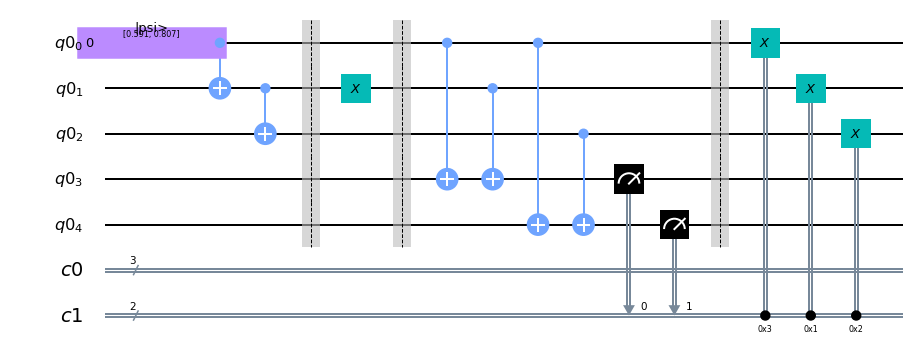

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import math
import random

qreg = QuantumRegister(5) # 3 qubit code and 2 ancilla qubits
creg = ClassicalRegister(3) # 3 classical bits for 3-bit code
c2 = ClassicalRegister(2) # 2 classical bits for ancilla bits
circ = QuantumCircuit(qreg, creg, c2)

thetha = 2*math.pi*random.random() # randomly initialize the quantum state by chosing angle between [0,2*pi] 
print("quantum state")
print("alpha: ", math.sin(thetha))
print("beta: ", math.cos(thetha))
print("square of ratio between alpha and beta: ", math.tan(thetha)**2)

circ.initialize([math.sin(thetha), math.cos(thetha)], [0]) # initialize qubit[0] with alpha and beta

circ.cx(qreg[0], qreg[1])
circ.cx(qreg[1], qreg[2])

circ.barrier(qreg)
# -----error - apply x gate to one of first 3 qubits to simulate bit flip error.
circ.x(qreg[1])
# -----error
circ.barrier(qreg) 

# correction
circ.cx(qreg[0], qreg[3]) # use ancilla bits to detect the error
circ.cx(qreg[1], qreg[3])
circ.cx(qreg[0], qreg[4])
circ.cx(qreg[2], qreg[4])

circ.measure(qreg[3], c2[0]) # measure ancilla bits
circ.measure(qreg[4], c2[1])

circ.barrier(qreg) 
circ.x(qreg[0]).c_if(c2, 3) # if we measured 11
circ.x(qreg[1]).c_if(c2, 1) # if we measured 10
circ.x(qreg[2]).c_if(c2, 2) # if we measured 01

circ.draw(output="mpl")

We use statevector simulator here to observe that we can restore initial state. We will see values of $\alpha$ and $\beta$ in the statevector.

In [3]:
job = execute(circ, Aer.get_backend('statevector_simulator'))
counts1 = job.result().get_statevector(circ)
print("state vector")
j = 0
for i in counts1:
  if abs(i) == 0: #because state vector is too long to print, just print with amplitute greater then zero.
    j = j+1
    continue
  print(i, "{0:b}".format(j).zfill(5))
  j = j+1

state vector
(0.5907685560439533+0j) 01000
(0.8068410705893339+0j) 01111


Now, we simulate the circuit several times to check observations from simulation are consistent with $\alpha$ and $\beta$

In [4]:
circ.measure(qreg[0], creg[0])
circ.measure(qreg[1], creg[1])
circ.measure(qreg[2], creg[2])

job = execute(circ, Aer.get_backend('qasm_simulator'), shots=5000)
counts1 = job.result().get_counts(circ)

print("Result")
print(counts1)

Result
{'01 000': 1658, '01 111': 3342}


### Three Qubit Sign-Flip Code

Sign-Flip error is similar to $Z$ gate like bit-flip is similar to $X$ gate. $ \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle$ becomes $\alpha \lvert 0 \rangle - \beta \lvert 1 \rangle$ after sign-flip. <br>

You can verify that,

> $HZH = X$ and $HH = I$ <br>

where $ H = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}\end{bmatrix}$, 
$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$, $ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$ and $ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$. <br>

So if we put Hadamard gates before and after Error block, we can deal sign-flip errors same as bit-flip. If there is no error, then two consecutive Hadamards cancel each other, if there is a $Z$ error then with two Hadamard, it will behave exactly like $X$ error.


![Sign Flip Code](https://raw.githubusercontent.com/ahmetyalp/cmpe492/master/Screenshot_2.png)


quantum state
alpha:  0.978801930977785
beta:  0.20480913044627538
square of ratio between alpha and beta:  22.839732204627285


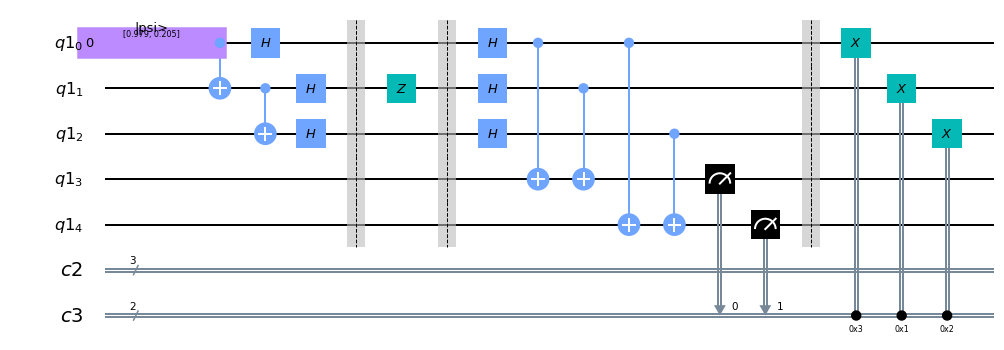

In [5]:
qreg = QuantumRegister(5) # 3 qubit code and 2 ancilla qubits
creg = ClassicalRegister(3) # 3 classical bits for 3-bit code
c2 = ClassicalRegister(2) # 2 classical bits for ancilla bits
circ = QuantumCircuit(qreg, creg, c2)

thetha = 2*math.pi*random.random() # randomly initialize the quantum state by chosing angle between [0,2*pi] 
print("quantum state")
print("alpha: ", math.sin(thetha))
print("beta: ", math.cos(thetha))
print("square of ratio between alpha and beta: ", math.tan(thetha)**2)

circ.initialize([math.sin(thetha), math.cos(thetha)], [0]) # initialize qubit[0] with alpha and beta

circ.cx(qreg[0], qreg[1])
circ.cx(qreg[1], qreg[2])

circ.h(qreg[0])
circ.h(qreg[1])
circ.h(qreg[2])
circ.barrier(qreg)
# error - apply z gate to one of first 3 qubits
circ.z(qreg[1])

circ.barrier(qreg) 
# correction
circ.h(qreg[0])
circ.h(qreg[1])
circ.h(qreg[2])

circ.cx(qreg[0], qreg[3]) # use ancilla bits to detect the error
circ.cx(qreg[1], qreg[3])
circ.cx(qreg[0], qreg[4])
circ.cx(qreg[2], qreg[4])

circ.measure(qreg[3], c2[0]) # measure ancilla bits
circ.measure(qreg[4], c2[1])

circ.barrier(qreg)
circ.x(qreg[0]).c_if(c2, 3) # if we measured 11
circ.x(qreg[1]).c_if(c2, 1) # if we measured 10
circ.x(qreg[2]).c_if(c2, 2) # if we measured 01

circ.draw(output="mpl")

In [6]:
job = execute(circ, Aer.get_backend('statevector_simulator'))
counts1 = job.result().get_statevector(circ)
j = 0
for i in counts1:
  if abs(i) == 0: #because state vector is too long to print, just print with amplitute greater then zero.
    j = j+1
    continue
  print(i, "{0:b}".format(j).zfill(5))
  j = j+1

(0.978801930977785-1.798029977656789e-16j) 01000
(0.20480913044627527-1.1286848071673274e-16j) 01111


In [7]:
circ.measure(qreg[0], creg[0])
circ.measure(qreg[1], creg[1])
circ.measure(qreg[2], creg[2])

job = execute(circ, Aer.get_backend('qasm_simulator'), shots=5000)
counts1 = job.result().get_counts(circ)

print("Result")
print(counts1)

Result
{'01 000': 4783, '01 111': 217}


### The Shor Code

We can correct one bit-flip or sign-flip error using 3-bit codes. The Shor Code is a 9-bit code which detects and corrects either a bit flip, a sign flip error, or both on one qubit. <br>

![9-bit Shor Code](https://raw.githubusercontent.com/ahmetyalp/cmpe492/master/Screenshot_3.png) <br>

The Shor code is a combination of sign-flip and bit-flip codes.

> $ \lvert \mu \rangle = \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle \rightarrow \alpha \lvert 0 \rangle_{L} + \beta \lvert 1 \rangle_{L} = \lvert \mu \rangle_{L} $  where <br>



> $ \lvert 0 \rangle_{L} = \frac{1}{\sqrt{8}}( \lvert 000 \rangle + \lvert 111 \rangle)( \lvert 000 \rangle + \lvert 111 \rangle)( \lvert 000 \rangle + \lvert 111 \rangle)$ and

> $ \lvert 1 \rangle_{L} = \frac{1}{\sqrt{8}}( \lvert 000 \rangle - \lvert 111 \rangle)( \lvert 000 \rangle - \lvert 111 \rangle)( \lvert 000 \rangle - \lvert 111 \rangle).$ <br>

Each group of three qubits (qubits 1,2,3 and 4,5,6 and 7,8,9) after Hadamard gates, are same as the 3-qubit bit-flip code. So, this code can correct one $X$ error on each of the three groups. <br>

For $Z$ errors, we compare signs of group 1,2 and 2,3. We encode each group to $\lvert 000 \rangle + \lvert 111 \rangle$ or $\lvert 000 \rangle - \lvert 111 \rangle$. $Z$ error on one qubit in a group can change $\lvert 000 \rangle + \lvert 111 \rangle$ to $\lvert 000 \rangle - \lvert 111 \rangle$ and vice versa. Verify that, this result does not depend on which qubit experiences the error. Now we can use the same logic used in 3-bit codes, by checking parity of the three groups, we can detect the error and will fix it. <br>

![](https://raw.githubusercontent.com/ahmetyalp/cmpe492/master/Screenshot_11.png) <br>

We will add two ancilla qubits. The first qubit checks groups 1,2 and the second qubit checks groups 2,3. 







In [9]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import math
import random

qreg = QuantumRegister(17) # 3 qubit code and 2 ancilla qubits for every group and 2 more for phase error
creg = ClassicalRegister(9) # 9 classical bits to measure the Shor code
c0 = ClassicalRegister(2) # 2 classical bits using while correcting X error on group 1
c1 = ClassicalRegister(2) # 2 classical bits using while correcting X error on group 2
c2 = ClassicalRegister(2) # 2 classical bits using while correcting X error on group 3
c3 = ClassicalRegister(2) # 2 classical bits using while correcting Z error
circ = QuantumCircuit(qreg, creg, c0, c1, c2, c3)

thetha = 2*math.pi*random.random() # randomly initialize quantum state to qreg[0]
print("init")
print(math.sin(thetha))
print(math.cos(thetha))
print(math.tan(thetha)**2)

circ.initialize([math.sin(thetha), math.cos(thetha)], [0])

# apply cnot and hadamard gates to prepare 9-bit code
circ.cx(qreg[0], qreg[3])
circ.cx(qreg[0], qreg[6])

circ.h(qreg[0])
circ.h(qreg[3])
circ.h(qreg[6])

circ.cx(qreg[0], qreg[1])
circ.cx(qreg[0], qreg[2])

circ.cx(qreg[3], qreg[4])
circ.cx(qreg[3], qreg[5])

circ.cx(qreg[6], qreg[7])
circ.cx(qreg[6], qreg[8])

circ.barrier(qreg)
# ERROR - insert a single bit error here. It can be a X, a Z or both X and Z error on single qubit from 9 qubits.
circ.z(qreg[6])
# ERROR  
circ.barrier(qreg) 

circ.cx(qreg[0], qreg[9]) # use ancilla bits to detect the X error. same as the 3-bit bitflip code, just apply to all three groups
circ.cx(qreg[1], qreg[9])
circ.cx(qreg[0], qreg[10])
circ.cx(qreg[2], qreg[10])
circ.cx(qreg[3], qreg[11]) 
circ.cx(qreg[4], qreg[11])
circ.cx(qreg[3], qreg[12])
circ.cx(qreg[5], qreg[12])
circ.cx(qreg[6], qreg[13]) 
circ.cx(qreg[7], qreg[13])
circ.cx(qreg[6], qreg[14])
circ.cx(qreg[8], qreg[14])

circ.barrier(qreg) 

circ.measure(qreg[9], c0[0]) # measure ancilla bits
circ.measure(qreg[10], c0[1])
circ.measure(qreg[11], c1[0])
circ.measure(qreg[12], c1[1])
circ.measure(qreg[13], c2[0])
circ.measure(qreg[14], c2[1])

circ.barrier(qreg) # correct the error

circ.x(qreg[0]).c_if(c0, 3) # if we measured 11
circ.x(qreg[1]).c_if(c0, 1) # if we measured 10
circ.x(qreg[2]).c_if(c0, 2) # if we measured 01

circ.x(qreg[3]).c_if(c1, 3) # if we measured 11
circ.x(qreg[4]).c_if(c1, 1) # if we measured 10
circ.x(qreg[5]).c_if(c1, 2) # if we measured 01


circ.x(qreg[6]).c_if(c2, 3) # if we measured 11
circ.x(qreg[7]).c_if(c2, 1) # if we measured 10
circ.x(qreg[8]).c_if(c2, 2) # if we measured 01


# Start to correct Z error
for i in range(9):
    circ.h(qreg[i])

for i in range(0,6):
    circ.cx(qreg[i], qreg[15])

for i in range(3,9):
    circ.cx(qreg[i], qreg[16])

for i in range(9):
    circ.h(qreg[i])

circ.barrier(qreg) 

circ.measure(qreg[15], c3[0]) # measure ancilla bits
circ.measure(qreg[16], c3[1])

circ.barrier(qreg) # correct the error

circ.z(qreg[3]).c_if(c3, 3) # if we measured 11, second group has error
circ.z(qreg[0]).c_if(c3, 1) # if we measured 11, first group has error
circ.z(qreg[6]).c_if(c3, 2) # if we measured 11, third group has error

circ.barrier(qreg)

# apply same gates to reverse the code(CNOT and Hadamards cancel each other if they applied twice). If we could correct the error, we will go back the initial state.
circ.cx(qreg[0], qreg[1])
circ.cx(qreg[0], qreg[2])

circ.cx(qreg[3], qreg[4])
circ.cx(qreg[3], qreg[5])

circ.cx(qreg[6], qreg[7])
circ.cx(qreg[6], qreg[8])

circ.h(qreg[0])
circ.h(qreg[3])
circ.h(qreg[6])

circ.cx(qreg[0], qreg[3])
circ.cx(qreg[0], qreg[6])

init
-0.5001292730450668
0.8659507550914273
0.33356322141905415


We use statevector simulator here to observe that we can restore the initial state. We will see values of $\alpha$ and $\beta$ in the statevector.

In [10]:
job = execute(circ, Aer.get_backend('statevector_simulator'))
counts1 = job.result().get_statevector(circ)
j = 0
for i in counts1:
  if abs(i) < 0.00001: #because state vector is too long to print, just print with amplitute greater enough.
    j = j+1
    continue
  print(i, "{0:b}".format(j).zfill(17))
  j = j+1

(-0.5001292730450667+6.431057990642604e-16j) 10000000000000000
(0.8659507550914275-1.4316531575966328e-15j) 10000000000000001


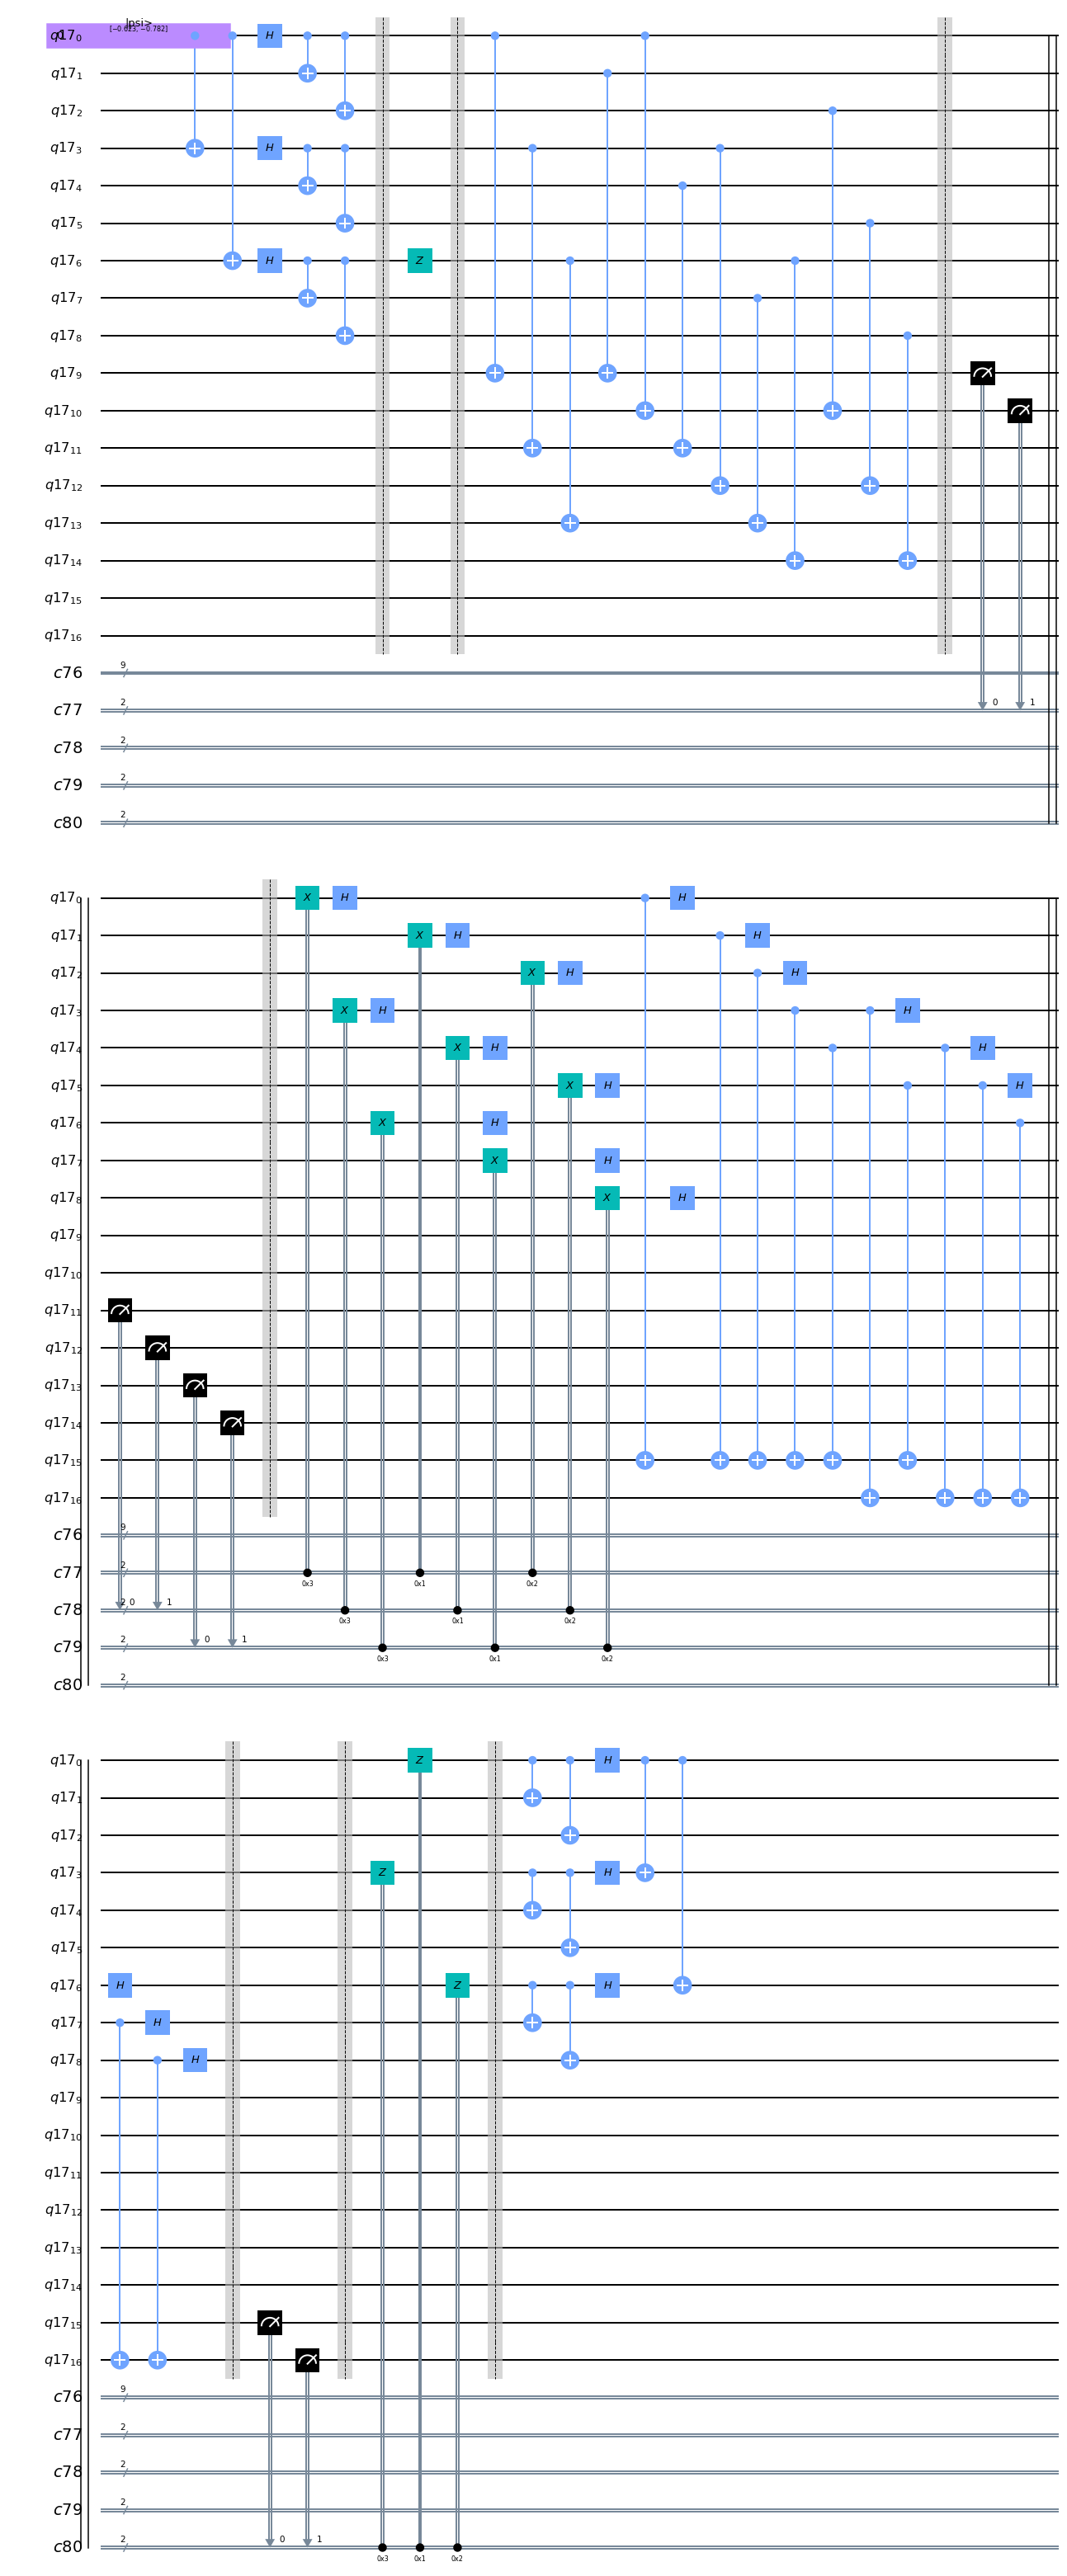

In [0]:
circ.draw(output='mpl')

Note that we look at the first 9 qubits (which are the last 9 bits, because Qiskit orders bits right to left) because we already measured the ancilla bits. Hence, we should see 000000001 or 0000000000 in the result with probabilities consistent with the initial value of qubit (alpha and beta). 

In [0]:
for i in range(9):
    circ.measure(qreg[i], creg[i])

job = execute(circ, Aer.get_backend('qasm_simulator'), shots=1024)
counts1 = job.result().get_counts(circ)

print("Result")
print(counts1)

Result
{'10 00 00 00 000000001': 621, '10 00 00 00 000000000': 403}


# References



*   https://arxiv.org/abs/0905.2794
*   https://www.wikiwand.com/en/Quantum_error_correction

